Modified heavily from ICESat-2 and GEDI Crossovers by David Shean, November 22, 2021

In [28]:
from sliderule import sliderule, earthdata, h5, raster, icesat2, gedi
import geopandas as gpd
import numpy as np
import pandas as pd
sliderule.init(verbose=True)

Let's look at Ellesmere Island. Holla @ [Jonathan Markle](https://j3d.space/) for this next snippet to get a bunch of datat without hitting `earthdata` limits

In [33]:
# manually defined using geojson.io
# aoi_filename = 'ellesmere.geojson'
aoi_filename = 'https://raw.githubusercontent.com/ICESAT-2HackWeek/dzdt/main/sites/.geojson'

aoi = gpd.GeoDataFrame.from_file(aoi_filename, crs='EPSG:4326')

In [34]:
region = sliderule.toregion(aoi_filename)

# Build ATL06 Request Parameters
parms_19 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2019-05-01',
    "t1":'2019-09-01',
}

parms_20 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2020-05-01',
    "t1":'2020-09-01',
}

parms_21 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2021-05-01',
    "t1":'2021-09-01',
}

parms_22 = {
    "poly": region["poly"],
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 7.0,
    "cnt": 10,
    "len": 20.0,
    "res": 10.0,
    "t0":'2022-05-01',
    "t1":'2022-09-01',
}


# Make ATL06 requests, trying to avoid sliderule resource limits
print('Getting 2019 data')
atl06_19 = icesat2.atl06p(parms_19)

print('Getting 2020 data')
atl06_20 = icesat2.atl06p(parms_20)

print('Getting 2021 data')
atl06_21 = icesat2.atl06p(parms_21)

print('Getting 2022 data')
atl06_22 = icesat2.atl06p(parms_22)


Getting 2019 data


INFO:sliderule.earthdata:Identified 57 resources to process


Getting 2020 data


INFO:sliderule.earthdata:Identified 63 resources to process


Getting 2021 data


INFO:sliderule.earthdata:Identified 64 resources to process


Getting 2022 data


INFO:sliderule.earthdata:Identified 63 resources to process


In [35]:
gdf = pd.concat([atl06_19, atl06_20, atl06_21, atl06_22])

In [36]:
# I didn't like that the timestamp was the index 
gdf = gdf.reset_index()

In [37]:
gdf

,time,h_mean,dh_fit_dy,distance,pflags,n_fit_photons,rms_misfit,rgt,gt,cycle,dh_fit_dx,w_surface_window_final,segment_id,spot,h_sigma,geometry
0,2019-05-02 09:11:49.860251392,59.265253,0.0,9.183031e+06,0,122,0.676928,521,50,3,0.233353,5.981841,458285,5,0.078595,POINT (-61.93488 82.13671)
1,2019-05-02 09:11:49.861660160,61.612141,0.0,9.183041e+06,0,232,0.652962,521,50,3,0.226155,5.799285,458286,5,0.042869,POINT (-61.93505 82.13679)
2,2019-05-02 09:11:49.863069440,63.703435,0.0,9.183051e+06,0,253,0.578095,521,50,3,0.196771,5.054803,458286,5,0.036742,POINT (-61.93522 82.13688)
3,2019-05-02 09:11:49.864480256,65.575650,0.0,9.183061e+06,0,229,0.502724,521,50,3,0.186824,4.803113,458287,5,0.033863,POINT (-61.93539 82.13697)
4,2019-05-02 09:11:49.865890304,67.222548,0.0,9.183071e+06,0,203,0.412225,521,50,3,0.156271,4.031562,458287,5,0.029819,POINT (-61.93556 82.13705)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551274,2022-08-27 23:17:44.370297088,411.000953,0.0,9.229679e+06,0,19,0.531552,1024,40,16,0.209075,5.366380,460623,3,0.144600,POINT (-63.49436 82.53170)
551275,2022-08-27 23:17:44.371707392,413.265455,0.0,9.229689e+06,0,20,0.520077,1024,40,16,0.260335,6.666648,460624,3,0.129678,POINT (-63.49455 82.53179)
551276,2022-08-27 23:17:44.373116672,415.666657,0.0,9.229699e+06,0,27,0.468310,1024,40,16,0.246740,6.321516,460624,3,0.094147,POINT (-63.49474 82.53187)
551277,2022-08-27 23:17:44.374526208,417.788881,0.0,9.229709e+06,0,21,0.439057,1024,40,16,0.211114,5.418034,460625,3,0.102782,POINT (-63.49493 82.53196)


In [53]:
# Take a quick peek to see how many tracks might cross!
# Note this will take forever if you have a ton of points
# gdf.plot(column='cycle')

# Find overlapping points within buffer
Now I'm creating a radius for the points, which involves some reprojection

In [39]:
# A little script I have to get the EPSG string to give to the to_crs function
epsg_string = int(32700-(np.round((45+gdf.geometry.y.values.mean())/90,0)*100)+np.round((183+gdf.geometry.x.values.mean())/6,0))

In [40]:
# Now generate a buffer around each point and make a new dataframe for that 
radius = 7 #radius in meters
gdf_utm = gdf.to_crs(f'EPSG: {epsg_string}')
gdf_crop_poly_geom = gdf_utm.geometry.buffer(radius)
# gdf_crop_poly_geom.to_crs('EPSG:4326').plot()
gdf_crop_poly = gpd.GeoDataFrame(gdf.copy(), geometry=gdf_crop_poly_geom).to_crs('EPSG:4326')
gdf_crop_poly.shape

(551279, 16)

In [41]:
# This is a function that I am pretty sure grabs points that intersect with
# a buffer and calculate the temporal difference between point and buffer
def xover_proc(df):
    #Convert back to point geometry
    df['geometry'] = df.centroid.geometry
    df['dt_diff'] = df['time_left'] - df['time_right']   
    #Remove any self intersections
    idx = (df.index != df['time_right'])
    return df.loc[idx]


In [42]:
# This is new for me! You can do a spatial join on a single geodataframe to find
# the points that intersect with the buffers 
# This creates multiples
xover = gpd.sjoin(
    gdf_crop_poly,
    gdf_crop_poly,
)

In [43]:
# Now calculate the height differences for intersection areas
# Note that there will be pairs of differences - the positive and negatve
# as you subtract an earlier track from a later track and vice versa
xover['h_mean_diff'] = xover['h_mean_left'] - xover['h_mean_right']

# And do the function that gets the temporal difference
# I don't think the centroid error is that important here
xover = xover_proc(xover)


/tmp/ipykernel_754/2390359495.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['geometry'] = df.centroid.geometry


OK so what have we done??

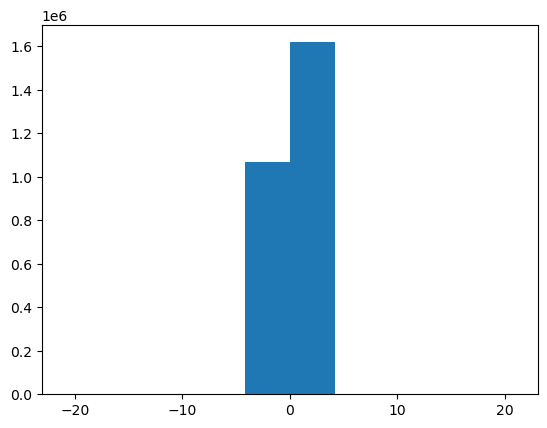

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = ax.hist(xover['h_mean_diff'].values)

So there are some huge height differences....seems weird but OK

# Temporal threshold

In [54]:
# What are the dates of these cycles?
xover.groupby('cycle_left')['time_left'].mean()

cycle_left
3    2019-05-27 01:56:22.721245696
4    2019-07-22 11:53:16.473898496
7    2020-05-24 12:02:46.704732160
8    2020-08-01 17:29:55.979678464
11   2021-05-18 05:02:44.888260096
12   2021-08-03 01:54:03.100808448
15   2022-05-21 21:04:12.548477952
16   2022-07-28 06:15:00.527221760
Name: time_left, dtype: datetime64[ns]

In [46]:
ndays = 30
dt_thresh = pd.Timedelta(days=ndays)
dt_thresh

Timedelta('30 days 00:00:00')

In [47]:
# Make sure the time between collection is more than 30 days
xover_thresh = xover.loc[xover['dt_diff'].abs() > dt_thresh]

In [48]:
# And now get rid of "doubles" by looking at only positive timedeltas
xover_thresh = xover_thresh[xover_thresh['dt_diff'] > pd.Timedelta(0)]

In [56]:
# Look at the unique combinations of cycle pairs for the crossovers
xover_thresh.groupby(['cycle_left', 'cycle_right']).size().reset_index().rename(columns={0:'count'})

,cycle_left,cycle_right,count
0,3,3,85
1,4,3,1862
2,7,3,20810
3,7,4,371
4,7,7,49
5,8,3,60058
6,8,4,528
7,8,7,20538
8,8,8,501
9,11,3,5293


# Map

I'm just going to look at cycles 16 minus 4 - late July three years apart!

In [57]:
exploring = gpd.GeoDataFrame(xover_thresh.filter(['h_mean_diff','cycle_left','cycle_right']), geometry=xover_thresh.geometry).to_crs('EPSG:4326')
exploring = exploring.query('cycle_left == 16 & cycle_right == 4')
exploring.explore(column='h_mean_diff', vmin=-2.0)

Interesting...

<AxesSubplot: ylabel='Frequency'>

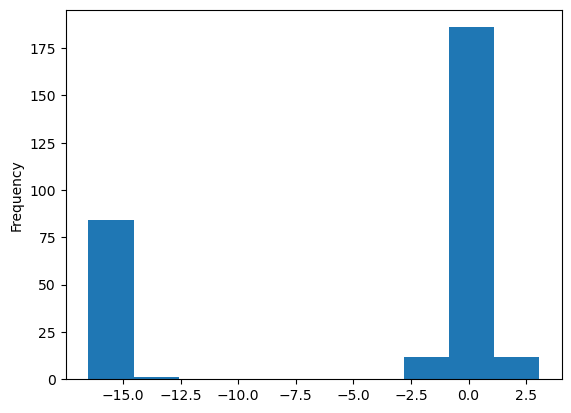

In [55]:
exploring['h_mean_diff'].plot.hist()

Yeah, not sure how I feel about that. I can believe the changes ~1.0 m but what are those big negative height differences??